<a href="https://colab.research.google.com/github/vimal-ai/house_price_pred/blob/master/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/My Drive/dataset/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.bath.describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [8]:
data.groupby('bath')['bath'].count()

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

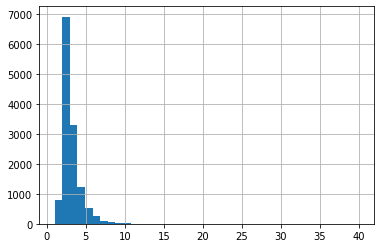

In [9]:
data.bath.hist(bins=40)

In [10]:
data.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [11]:
data.groupby('balcony')['balcony'].count()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

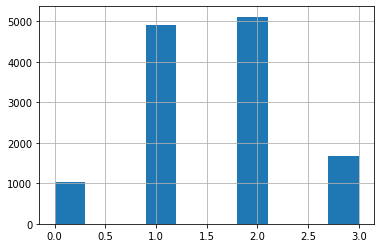

In [12]:
data.balcony.hist()

In [13]:
data['bath'].fillna(2, inplace = True)

In [14]:
data['balcony'].fillna(2, inplace = True)

In [15]:
data.groupby('society')['society'].count()

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [16]:
len(data.society.unique())

2689

In [17]:
data.drop(['society'], axis=1, inplace=True)

In [18]:
data.dropna(inplace=True)

In [19]:
data.groupby('size')['size'].count()

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4309
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [20]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [21]:
data

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [22]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [24]:
data[~data['total_sqft'].apply(lambda x:is_float(x))]['total_sqft'].unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '4125Perch', '1120 - 1145',
       '4400 - 6640', '3090 - 5002', '4400 - 6800', '1160 - 1195',
       '1000Sq. Meter', '4000 - 5249', '1115 - 1130', '1100Sq. Yards',
       '520 - 645', '1000 - 1285', '3606 - 5091', '650 - 665',
       '633 - 666', '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116',
       '850 - 1093', '1440 - 1884', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '660 - 670', '1500Sq. Meter', '620 - 933', '142.61Sq. Meter',
       '2695 - 2940', '1574Sq. Yards', '3450 - 3472', '1250 - 1305',
       '670 - 980', '1005.03 - 1252.49', '1004 - 1204', '361.33Sq. Yards',
       '645 - 936', '2710 - 3360', '2249.81 - 4112.19', '3436 - 3643',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '9

In [25]:
def con_sqft(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return np.nan

In [26]:
data.total_sqft = data.total_sqft.apply(lambda x: con_sqft(x))

In [27]:
data

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [28]:
data.dropna(inplace=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f14532709e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f145327e438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f145327eeb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f145327eb38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1453270cf8>,
  <matplotlib.lines.Line2D at 0x7f145327e0b8>]}

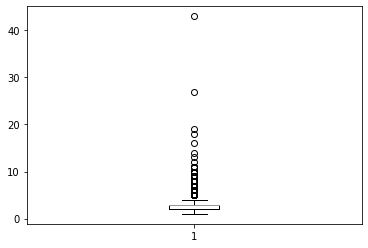

In [29]:
plt.boxplot(data.bhk)

In [30]:
data[data['bhk']>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,5000.0,9.0,3.0,360.0,11
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,1200.0,11.0,0.0,170.0,11
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,2000.0,16.0,2.0,490.0,19
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,10000.0,16.0,2.0,550.0,16
3853,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,1200.0,6.0,3.0,150.0,11
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43
4916,Super built-up Area,Ready To Move,1Channasandra,14 BHK,1250.0,15.0,0.0,125.0,14
6533,Plot Area,Ready To Move,Mysore Road,12 Bedroom,2232.0,6.0,2.0,300.0,12
7979,Super built-up Area,Ready To Move,1 Immadihalli,11 BHK,6000.0,12.0,2.0,150.0,11


In [31]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [32]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
len(data['location'].unique())

1298

In [36]:
data.location = data.location.apply(lambda x: x.strip())
location_stats = data.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [37]:
len(location_stats[location_stats < 10])

1033

In [39]:
other = location_stats[location_stats < 10]
other

location
B Narayanapura          9
Banagiri Nagar          9
Kaverappa Layout        9
Ejipura                 9
Chennammana Kere        9
                       ..
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
Kodanda Reddy Layout    1
1 Annasandrapalya       1
Name: location, Length: 1033, dtype: int64

In [40]:
data.location = data.location.apply(lambda x: 'other' if x in other else x)
len(data.location.unique())

255

In [42]:
data.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [45]:
data[data.total_sqft/data.bhk < 300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [46]:
data.shape

(13257, 10)

In [47]:
data = data[~(data.total_sqft/data.bhk < 300)]
data.shape

(12513, 10)

In [48]:
data.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

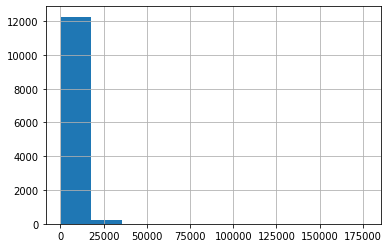

In [51]:
data.price_per_sqft.hist()

In [54]:
def remove_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduce_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out, reduce_df], ignore_index=True)
  return df_out

In [55]:
df1 = remove_outliers(data)
df1.shape

(10267, 10)

In [61]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  plt.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label='2 bhk', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color = 'red', label='3 bhk', s=50)
  plt.xlabel('Total sqft area')
  plt.ylabel('price')
  plt.title(location)
  plt.legend()
  plt.show()

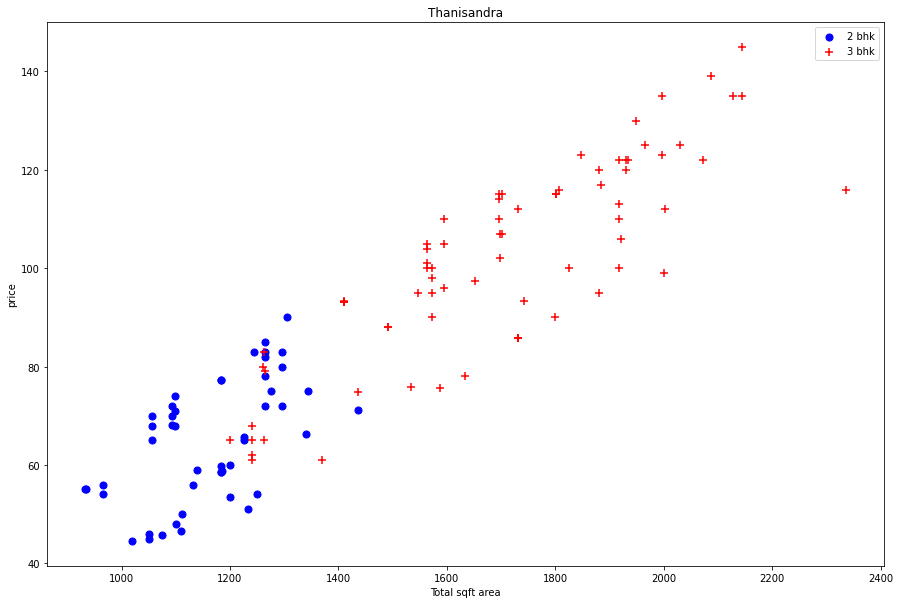

In [62]:
plot_scatter_chart(df1, 'Thanisandra')

(array([6.572e+03, 2.615e+03, 9.130e+02, 1.070e+02, 4.400e+01, 1.000e+01,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

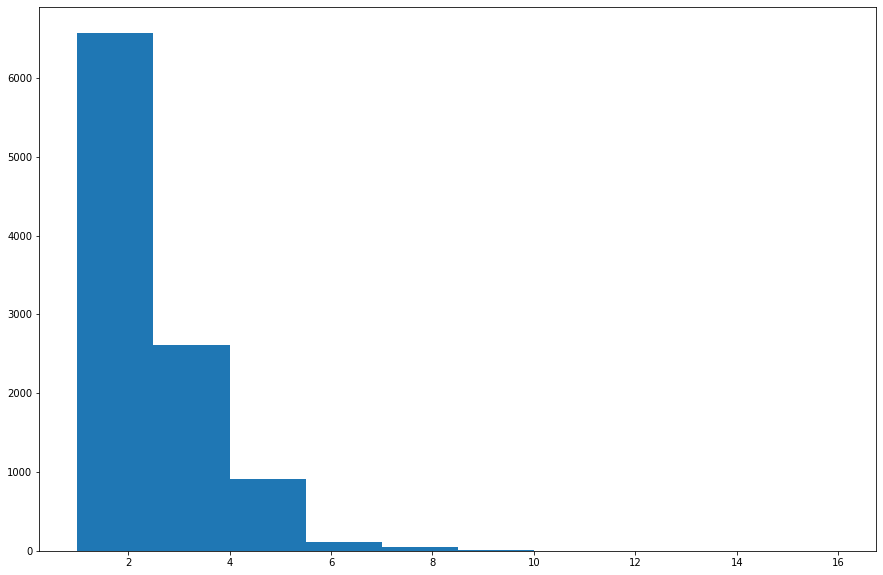

In [63]:
plt.hist(df1.bath)

In [65]:
df1 = df1[df1.bath < df1.bhk+2]

In [67]:
df1.shape

(10173, 10)

In [85]:
def remove_bhk_outliers(df):
  exclude_indicates = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean' : np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk - 1)
      if stats and stats['count'] > 5:
        exclude_indicates = np.append(exclude_indicates, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indicates, axis='index')

In [86]:
df2 = remove_bhk_outliers(df1)
df2.shape

(7328, 10)

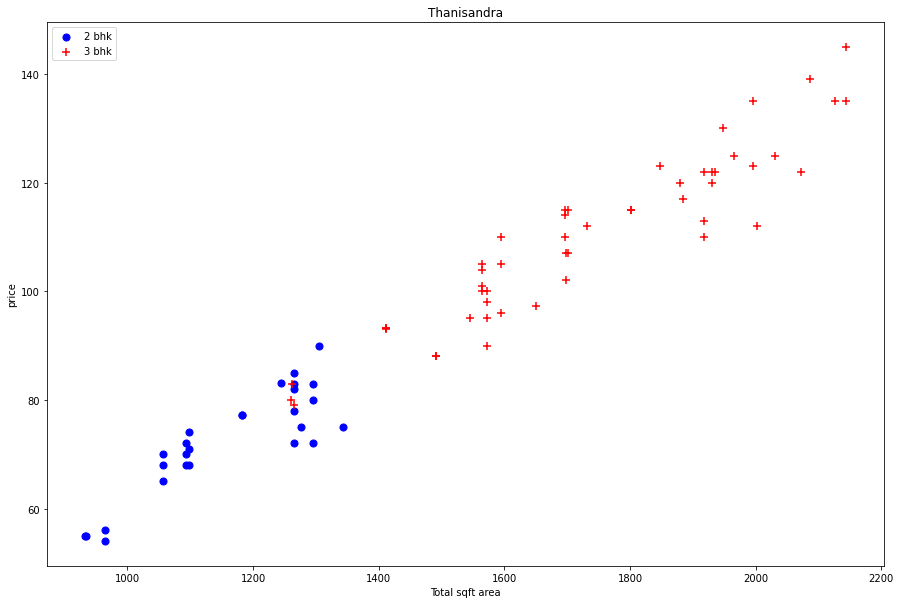

In [87]:
plot_scatter_chart(df2, 'Thanisandra')

In [89]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [91]:
colm = ['size', 'price_per_sqft', 'availability']
clean_data = df2.drop(columns=colm, axis=1)

In [92]:
clean_data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [94]:
clean_data.to_csv('clean_data.csv', index=False)